In [20]:
import random
import torch
from torch import nn, optim
import numpy as np
import pandas as pd
import math
from IPython import display
import matplotlib.pyplot as plt

In [21]:
import plot_lib

plot_lib.set_default()

In [3]:
seed = 42
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # кол-во точек
D = 2     # размерность данных (плоскость)
C = 5     # количество признаков
H = 100  # количество нейронов в скрытом слое

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [63]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=0.1, center_box=(-1.0, 1.0))

In [64]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()

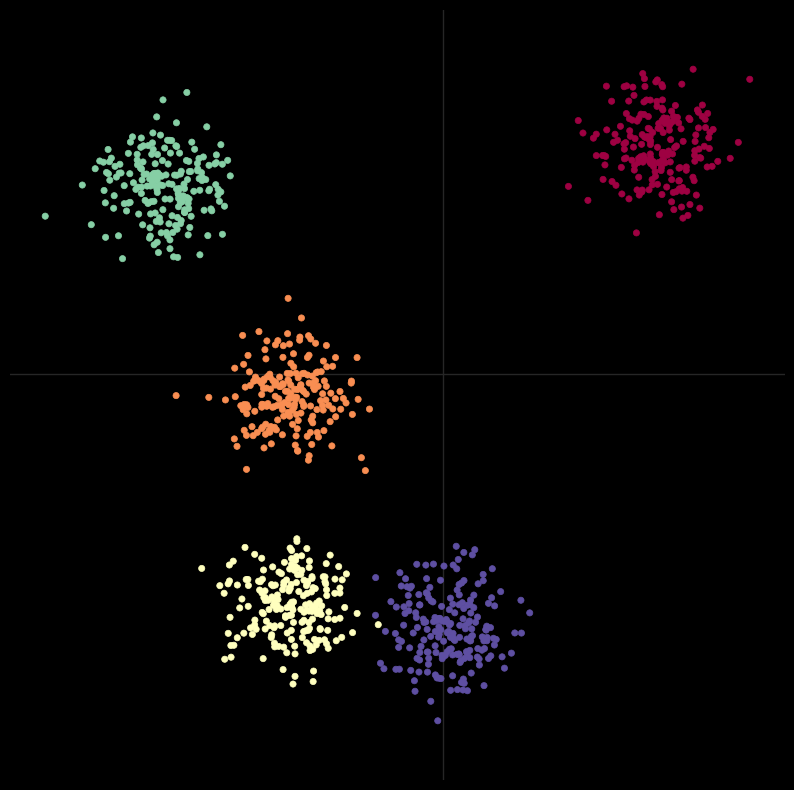

In [65]:
plot_lib.plot_data(X, y, auto=True)

In [66]:
def make_train_step(model, loss_fn, optimizer):
    def train_step(X, y):
        model.train()
        yhat = model(X)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step

In [67]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)

lambda_l2 = 0.00001
lr = 0.1
n_epochs = 1000
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=lambda_l2)
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
   loss = train_step(X, y)

print(loss)

0.002059970749542117


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=5, bias=True)
)


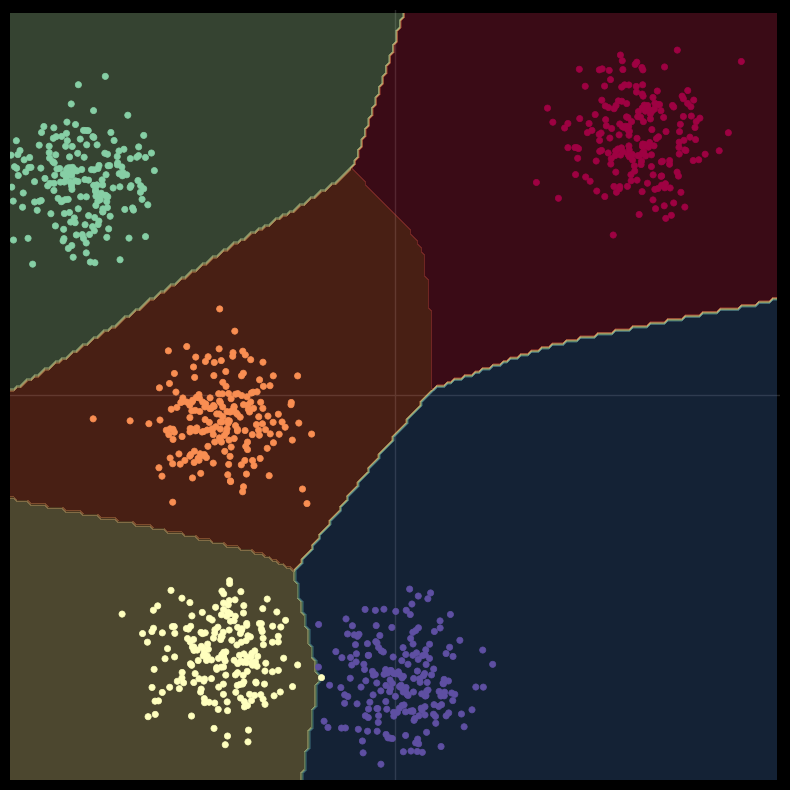

In [68]:
print(model)
plot_lib.plot_model(X, y, model)